In [1]:
pip install tensorflow

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
76/76 [==============================] - 4s 11ms/step - loss: 0.0021
Epoch 2/50
76/76 [==============================] - 1s 11ms/step - loss: 2.3032e-05
Epoch 3/50
76/76 [==============================] - 1s 11ms/step - loss: 2.1011e-05
Epoch 4/50
76/76 [==============================] - 1s 11ms/step - loss: 2.0900e-05
Epoch 5/50
76/76 [==============================] - 1s 11ms/step - loss: 2.1534e-05
Epoch 6/50
76/76 [==============================] - 1s 11ms/step - loss: 2.1485e-05
Epoch 7/50
76/76 [==============================] - 1s 11ms/step - loss: 2.2700e-05
Epoch 8/50
76/76 [==============================] - 1s 11ms/step - loss: 2.3128e-05
Epoch 9/50
76/76 [==============================] - 1s 11ms/step - loss: 2.3297e-05
Epoch 10/50
76/76 [==============================] - 1s 11ms/step - loss: 2.0274e-05
Epoch 11/50
76/76 [==============================] - 1s 11ms/step - loss: 2.3322e-05
Epoch 12/

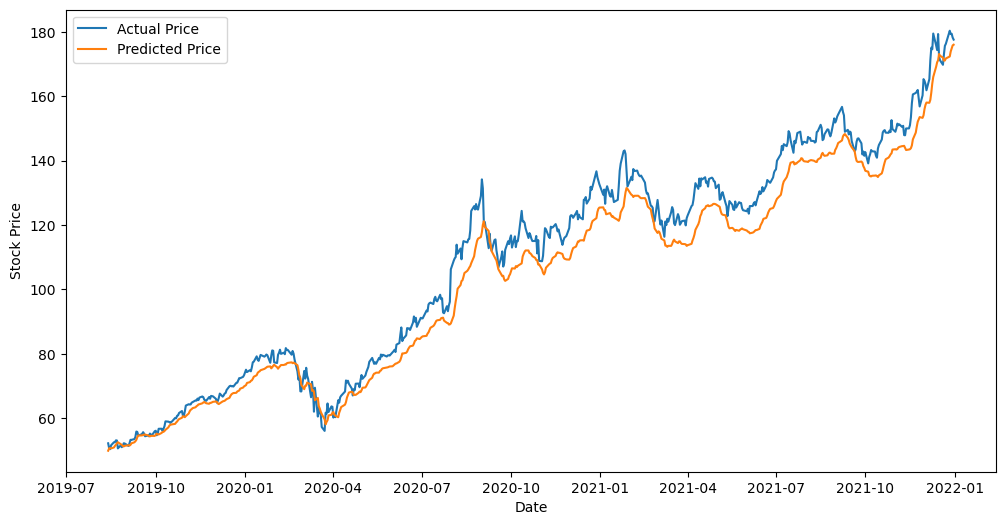

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load historical stock price data
def load_stock_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df

# Step 2: Preprocess the data
def preprocess_data(df):
    scaler = MinMaxScaler()
    df['Normalized Close'] = scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))
    return df

# Step 3: Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

# Step 4: Build the LSTM model
def build_model(seq_length):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 5: Train the model
def train_model(model, X_train, y_train, epochs):
    model.fit(X_train, y_train, epochs=epochs, batch_size=32)

# Step 6: Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Main function
if __name__ == "__main__":
    ticker = 'AAPL'  # Change this to the stock symbol you want to predict
    start_date = '2010-01-01'
    end_date = '2022-01-01'
    seq_length = 10
    epochs = 50

    df = load_stock_data(ticker, start_date, end_date)
    df = preprocess_data(df)

    sequences, target = create_sequences(df['Normalized Close'].values, seq_length)

    # Split data into training and testing sets
    train_size = int(0.8 * len(sequences))
    X_train, X_test = sequences[:train_size], sequences[train_size:]
    y_train, y_test = target[:train_size], target[train_size:]

    model = build_model(seq_length)
    train_model(model, X_train, y_train, epochs)

    predictions = make_predictions(model, X_test)

    # Inverse transform the predictions
    scaler = MinMaxScaler()
    scaler.fit(np.array(df['Close']).reshape(-1, 1))
    predictions = scaler.inverse_transform(predictions)

    # Plot the actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[train_size + seq_length:], df['Close'].values[train_size + seq_length:], label='Actual Price')
    plt.plot(df.index[train_size + seq_length:], predictions, label='Predicted Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
